# Studies of time series data

## Reading and plotting stock PETR4 and BVSP

In [1]:
import numpy as np
import pandas as pd
import Operations as Op
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dates = pd.date_range('2018-01-01', '2018-09-30')
symbols = ['^BVSP', 'PETR4.SA']
df = Op.get_data(symbols, dates)

In [3]:
df.tail()

,^BVSP,PETR4.SA
2018-09-24,77984.0,20.000000
2018-09-25,78630.0,20.080000
2018-09-26,78656.0,20.190001
2018-09-27,80000.0,21.459999
2018-09-28,79342.0,21.090000


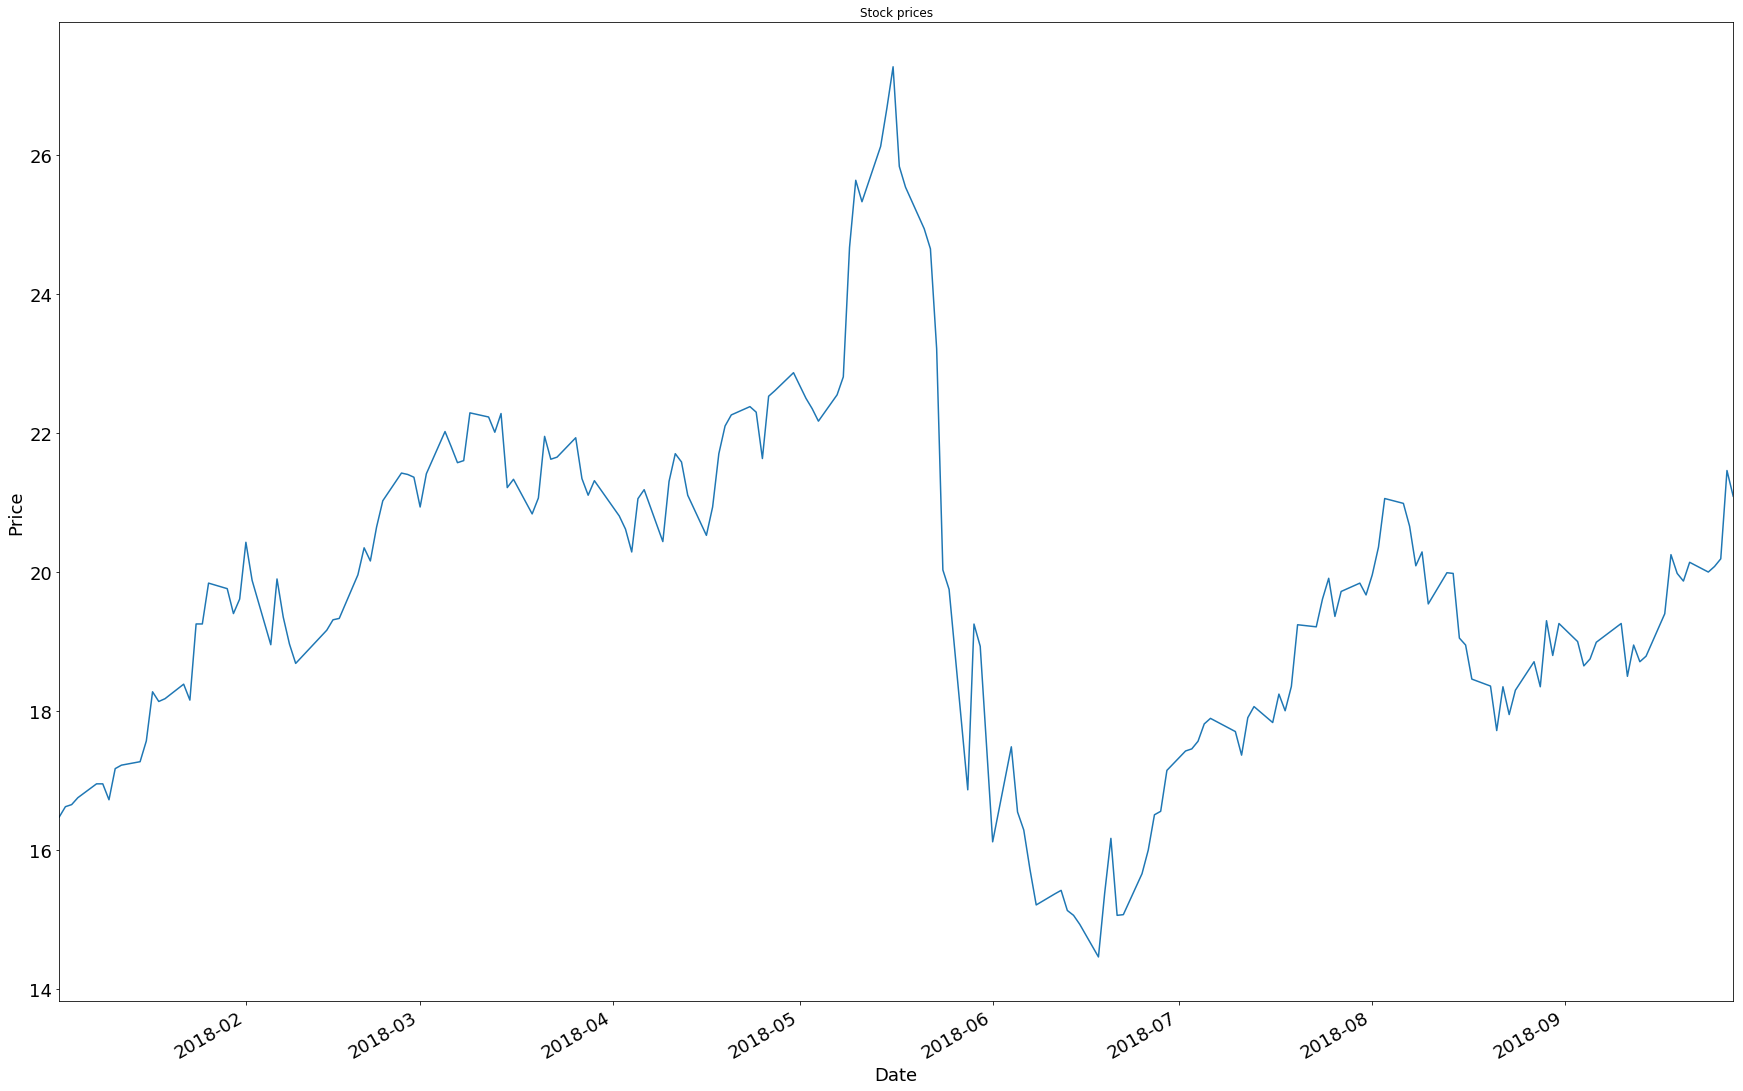

In [4]:
Op.plot_data(df['PETR4.SA']);

### Calculate Bollinger Bands

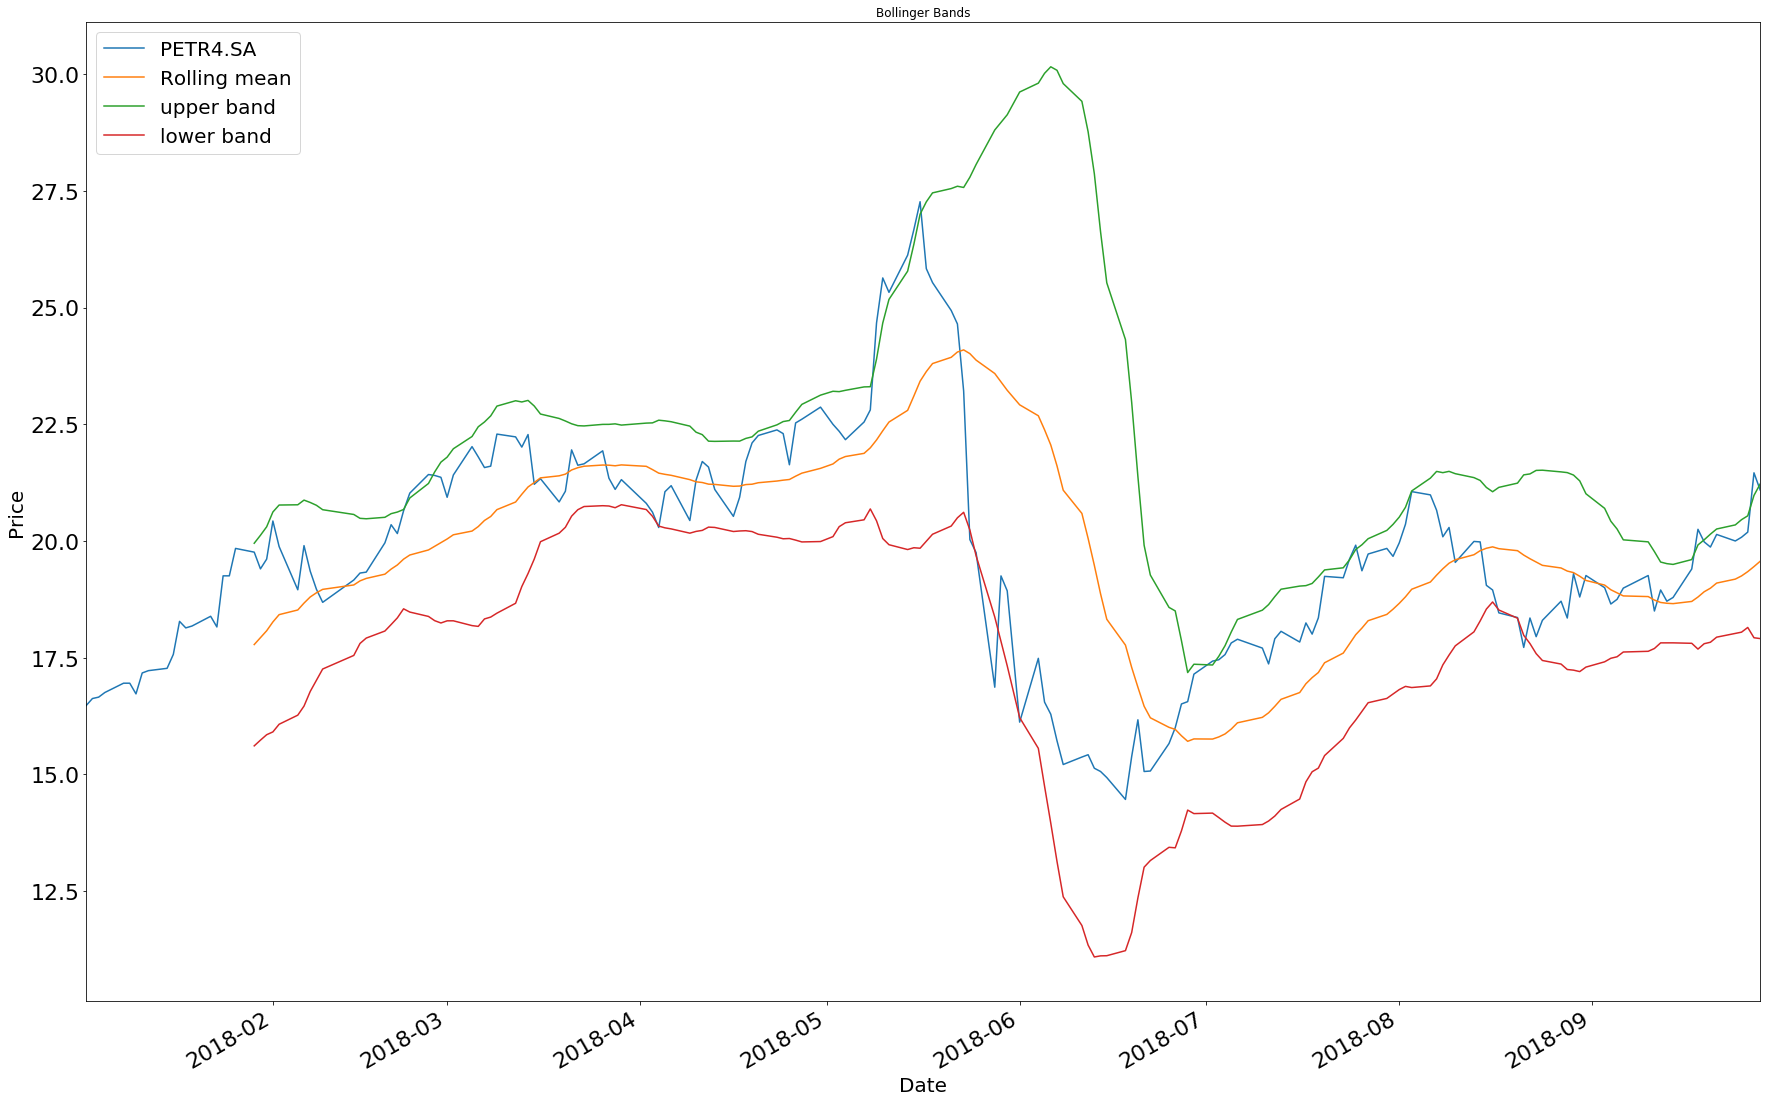

In [5]:
# Read data
dates = pd.date_range('2018-01-01', '2018-09-30')
symbols = ['^BVSP', 'PETR4.SA']
df = Op.get_data(symbols, dates)

# Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = Op.get_rolling_mean(df['PETR4.SA'], window=20)

# 2. Compute rolling standard deviation
rstd_SPY = Op.get_rolling_std(df['PETR4.SA'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = Op.get_bollinger_bands(rm_SPY, rstd_SPY)

# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['PETR4.SA'].plot(title="Bollinger Bands", label='PETR4.SA', figsize=(30,20), fontsize=(22))
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date", fontsize=(20))
ax.set_ylabel("Price", fontsize=(20))
ax.legend(loc='upper left', fontsize=(20))
plt.show();

### Compute daily returns

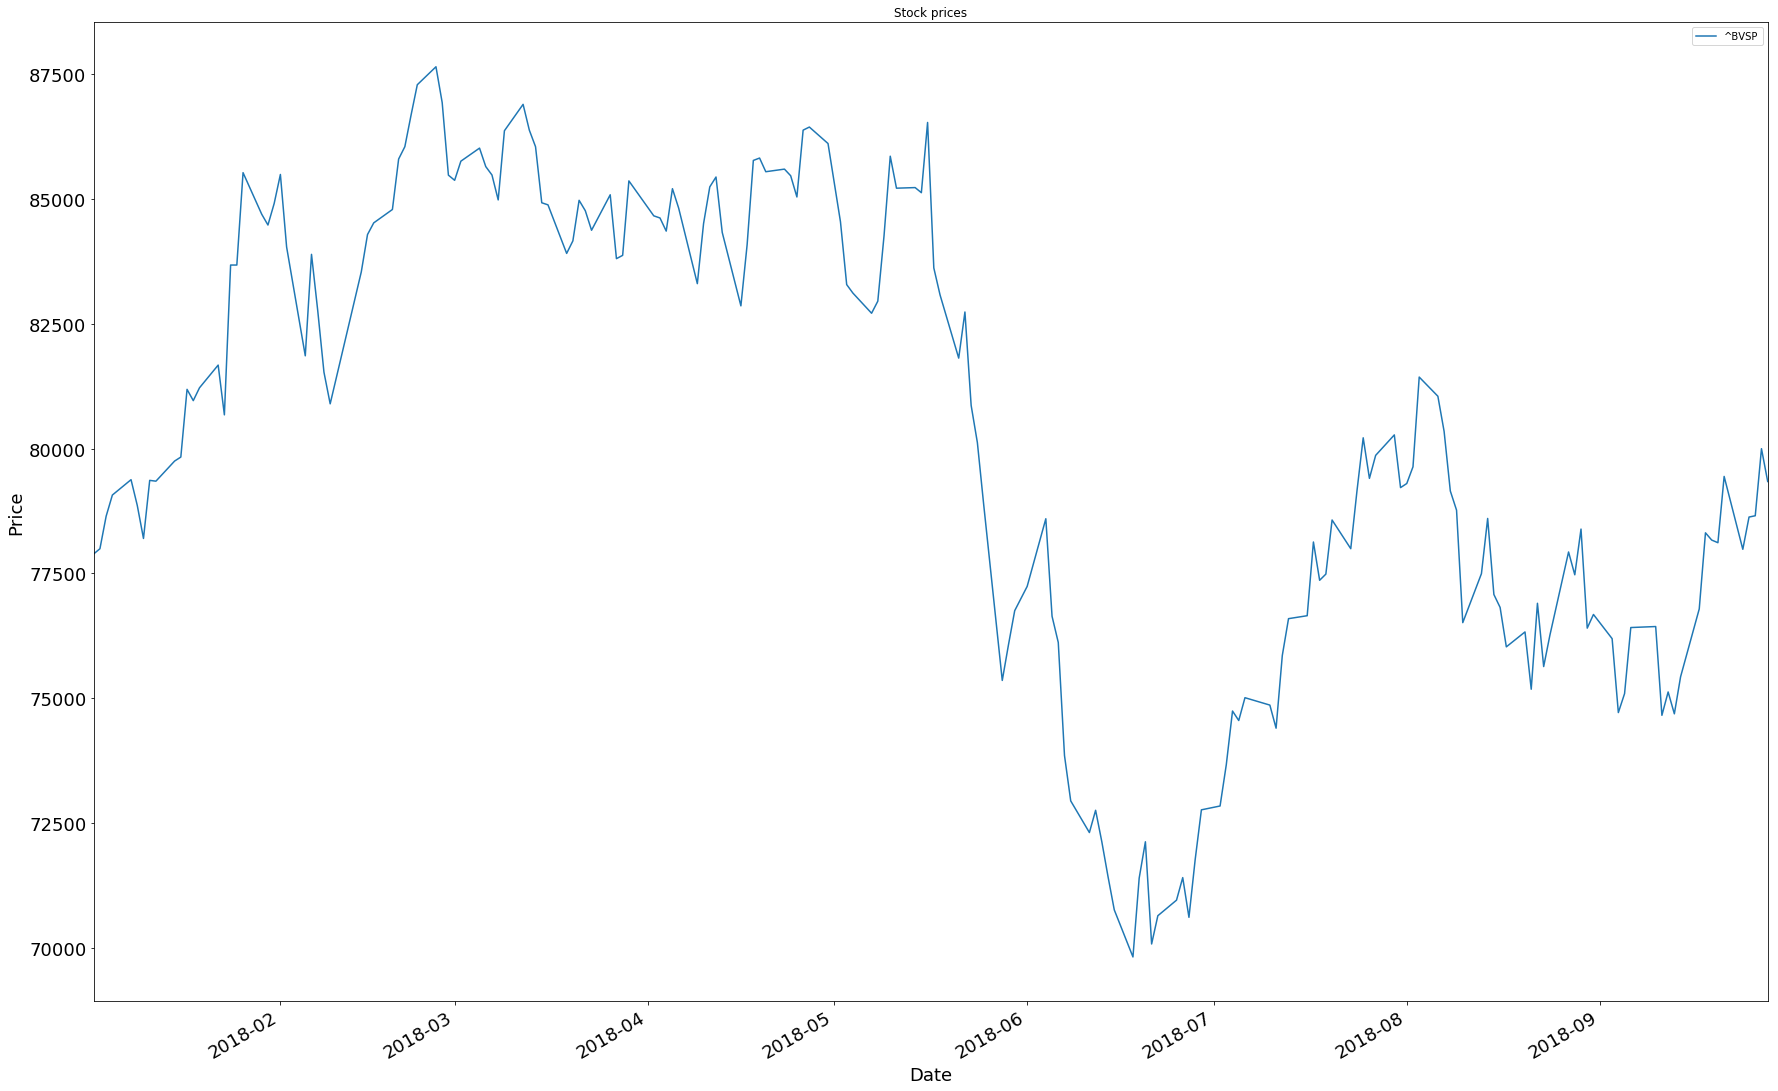

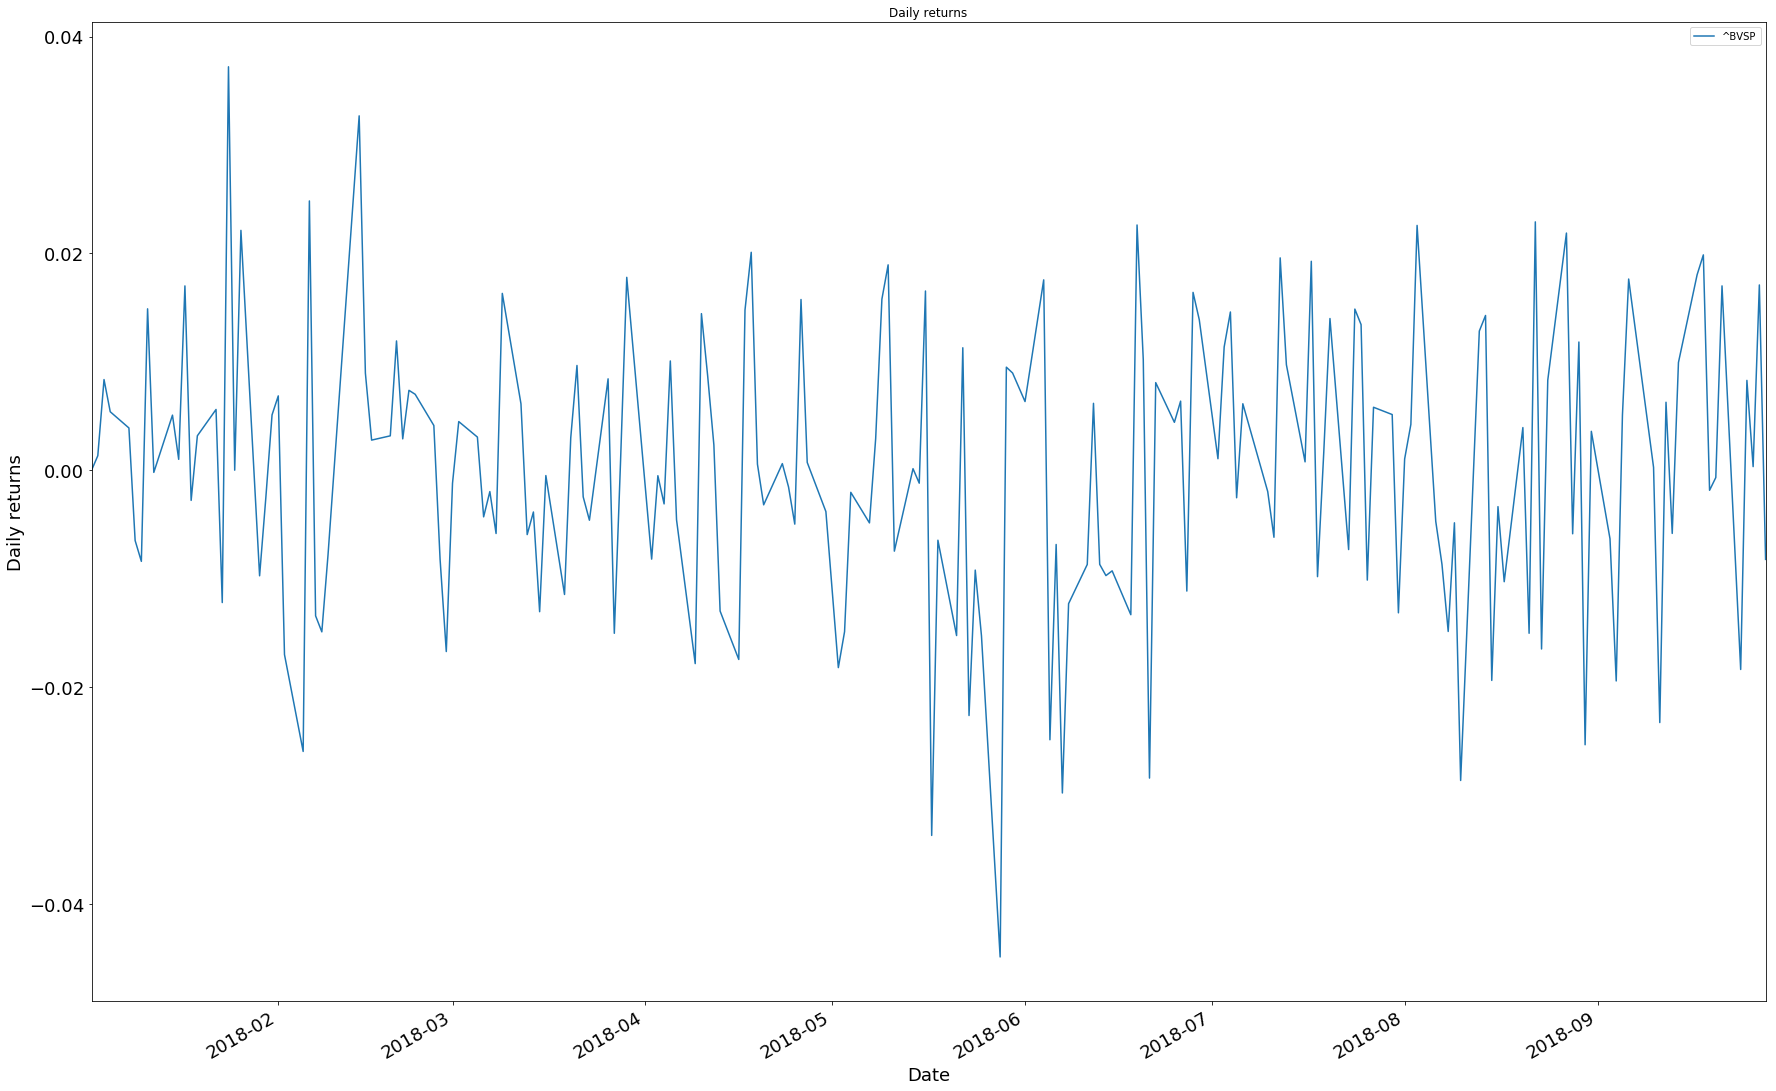

In [8]:
# Read data
dates = pd.date_range('2018-01-01', '2018-09-30')
symbols = ['^BVSP']
df = Op.get_data(symbols, dates)
Op.plot_data(df)

# Compute daily returns
daily_returns = Op.compute_daily_returns(df)
Op.plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E030421F98>]], dtype=object)

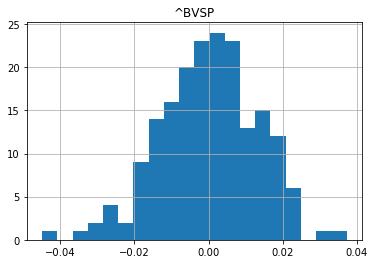

In [10]:
# Compute daily returns
daily_returns.hist(bins=20)

In [13]:
# Calculate the mean and standart deviation on daily returns
daily_returns_mean = daily_returns['^BVSP'].mean()
daily_returns_std = daily_returns['^BVSP'].std()
print("Mean = ", daily_returns_mean)
print("Std = ", daily_returns_std)

Mean =  0.00018421036143878697
Std =  0.013098391540616065


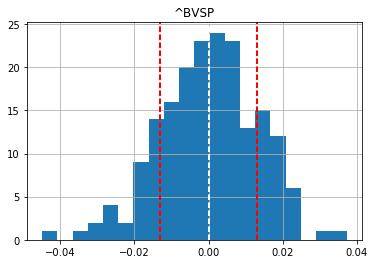

In [18]:
daily_returns.hist(bins=20)
plt.axvline(daily_returns_mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(daily_returns_std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-daily_returns_std, color='r', linestyle='dashed', linewidth=2)
plt.show()

Calculate Kurtosis

In [20]:
print(daily_returns.kurtosis())

^BVSP    0.34816
dtype: float64


Plot two histograms together

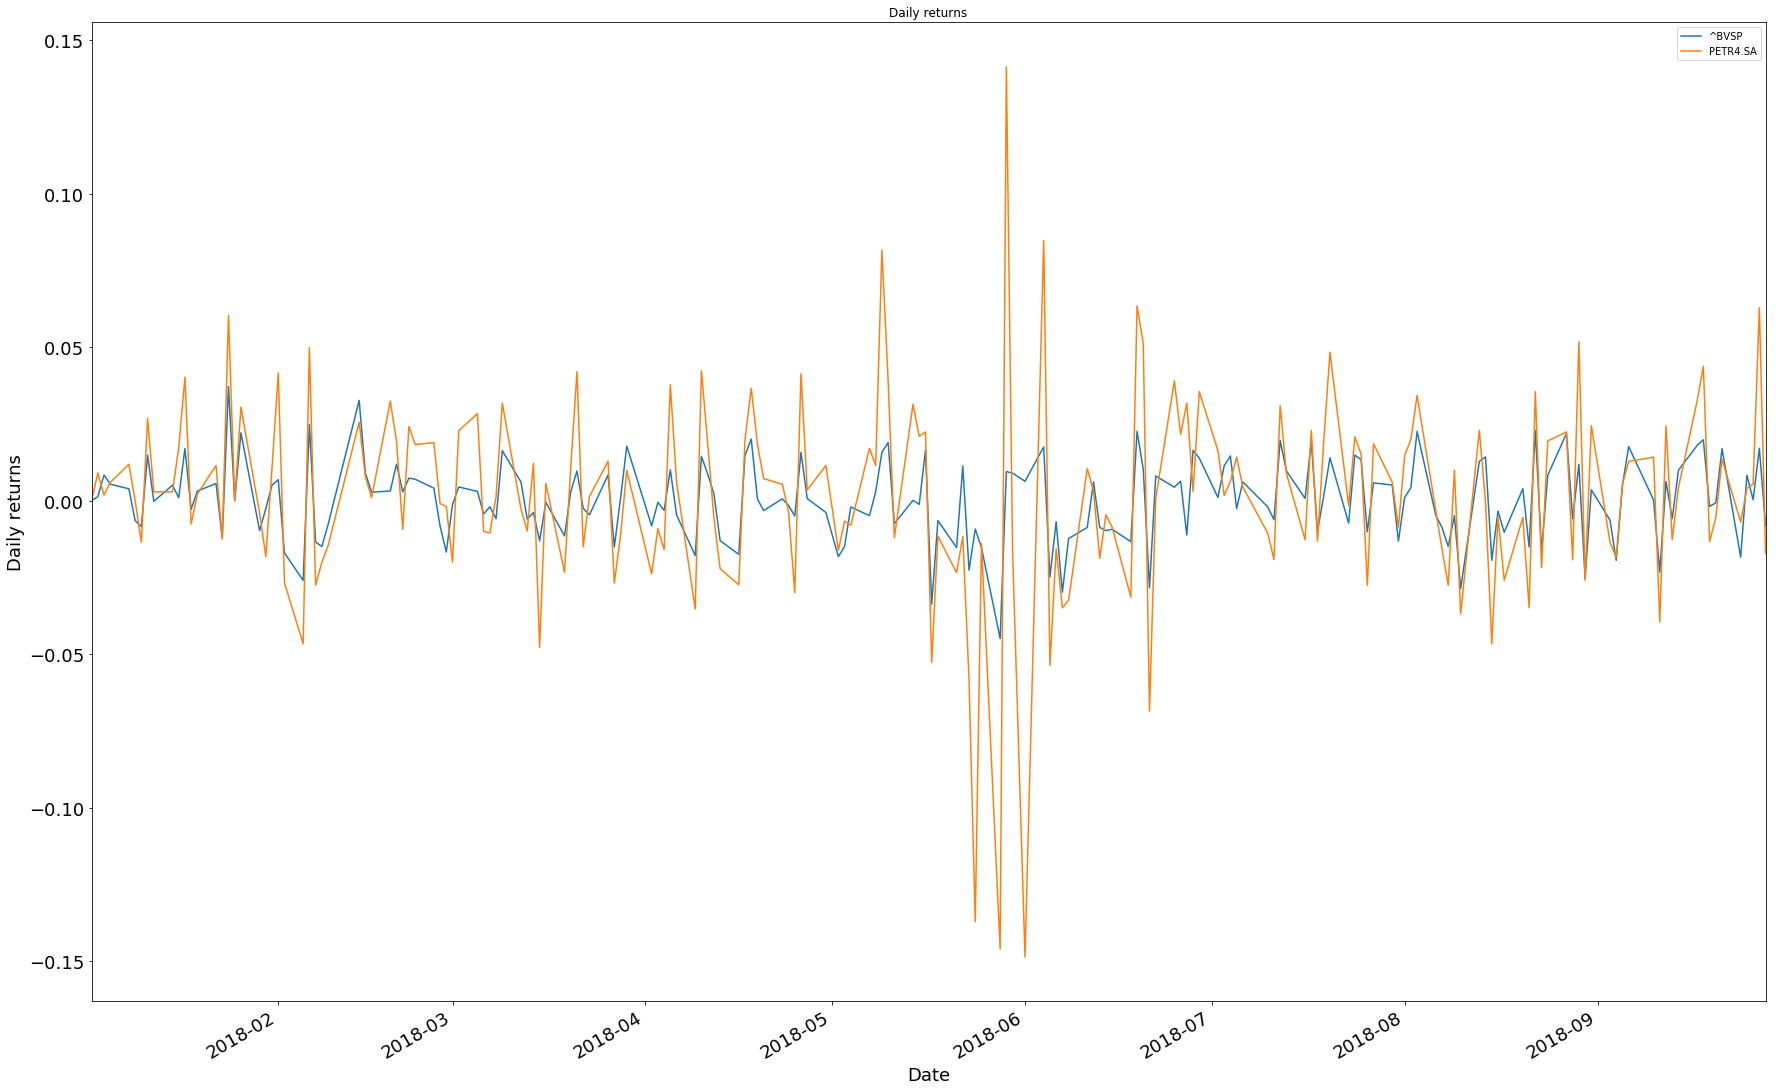

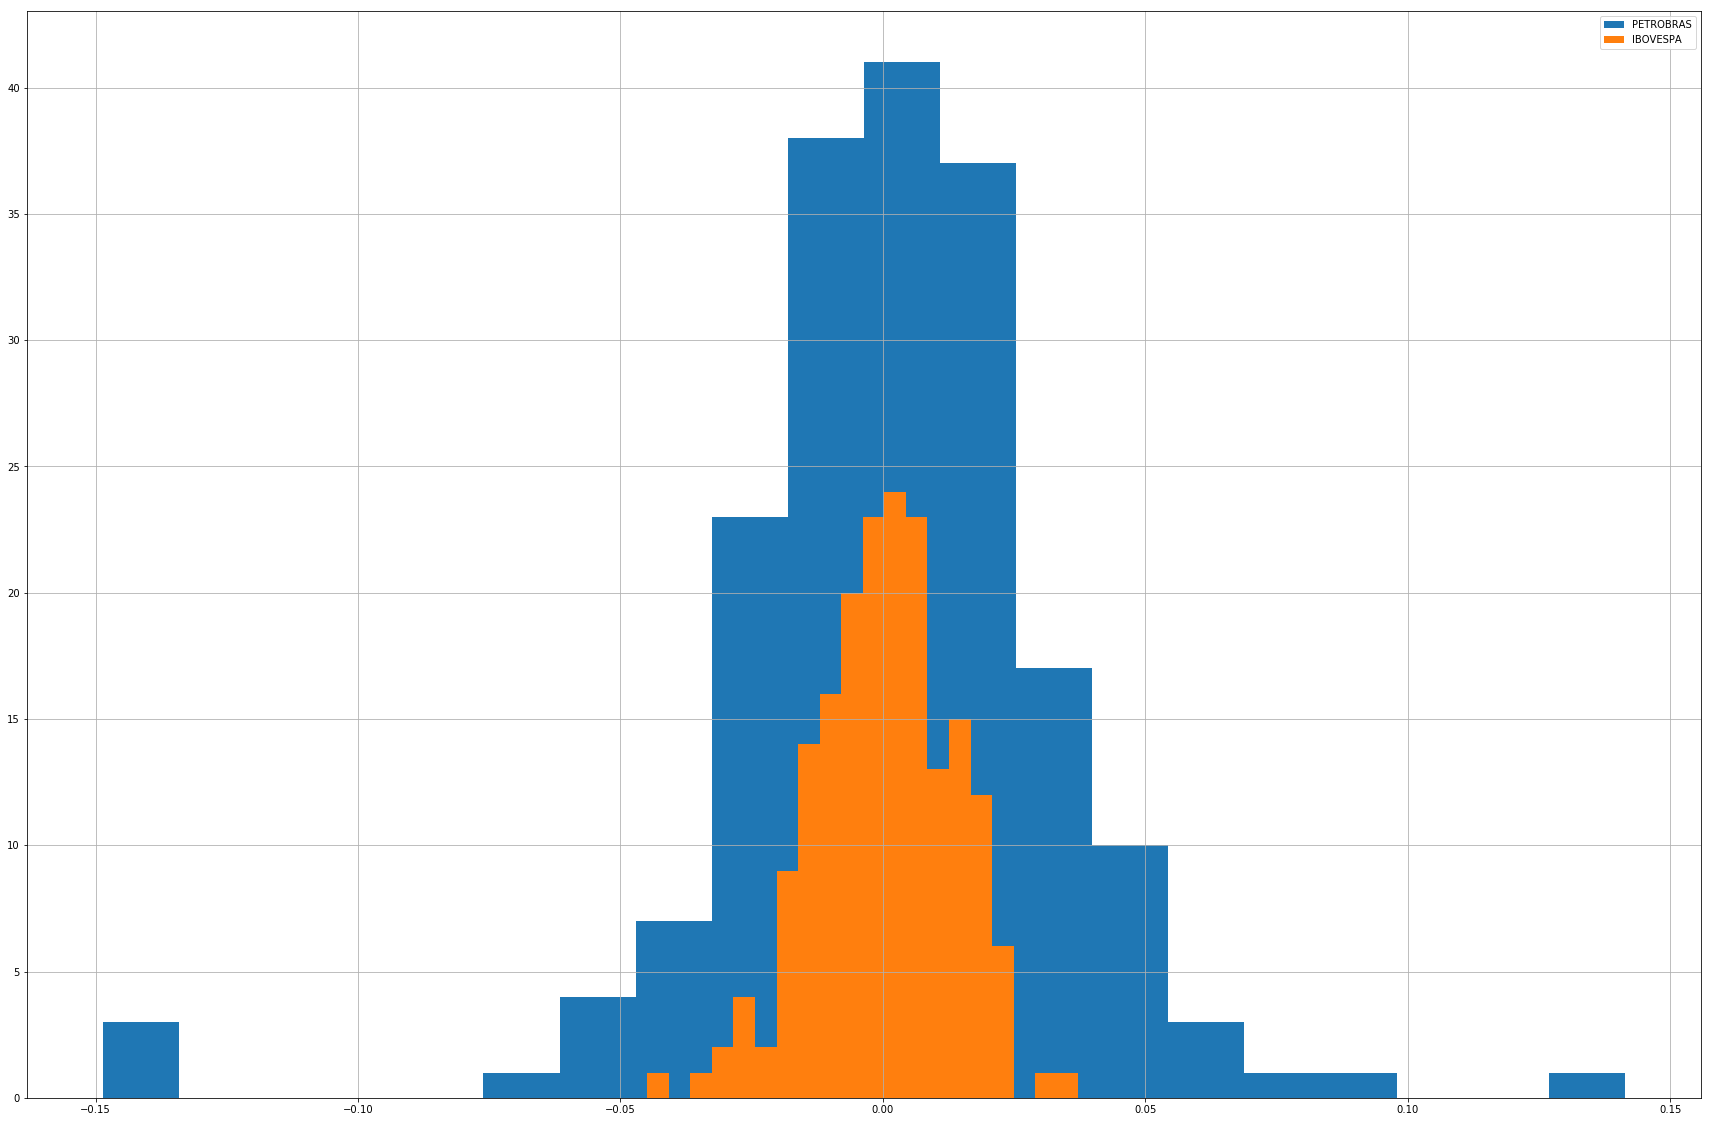

In [34]:
# Read data
dates = pd.date_range('2018-01-01', '2018-09-30')
symbols = ['^BVSP', 'PETR4.SA']
df = Op.get_data(symbols, dates)
#Op.plot_data(df)

# Compute daily returns
daily_returns = Op.compute_daily_returns(df)
Op.plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

# Plot histogram directly from dataframe
daily_returns['PETR4.SA'].hist(bins=20, figsize=(30,20), label="PETROBRAS")
daily_returns['^BVSP'].hist(bins=20, figsize=(30,20), label="IBOVESPA")
plt.legend(loc='upper right')

Scatterplots

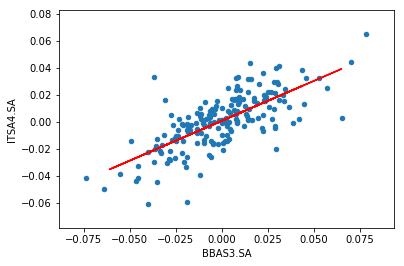

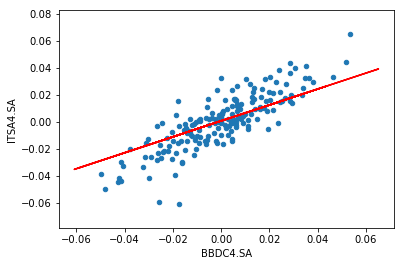

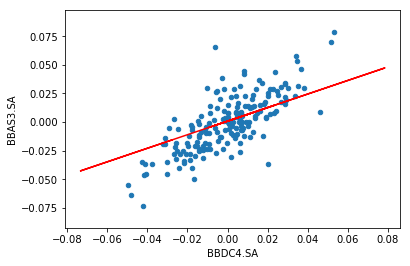

In [44]:
# Read data
dates = pd.date_range('2018-01-01', '2018-09-30')
symbols = ['BBDC4.SA', 'BBAS3.SA', 'ITSA4.SA']
df = Op.get_data(symbols, dates)
#Op.plot_data(df[['BBAS3.SA', 'ITSA4.SA', 'BBDC4.SA']])

# Compute daily returns
daily_returns = Op.compute_daily_returns(df)
#Op.plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

# Itau x Brasil
daily_returns.plot(kind='scatter', x='BBAS3.SA', y='ITSA4.SA')
beta_ib, alpha_ib = np.polyfit(daily_returns['BBAS3.SA'], daily_returns['ITSA4.SA'], 1)
plt.plot(daily_returns['ITSA4.SA'], beta_ib*daily_returns['ITSA4.SA'] + alpha_ib, '-', color='r')

# Itau x Bradesco
daily_returns.plot(kind='scatter', x='BBDC4.SA', y='ITSA4.SA')
beta_ibc, alpha_ibc = np.polyfit(daily_returns['BBDC4.SA'], daily_returns['ITSA4.SA'], 1)
plt.plot(daily_returns['ITSA4.SA'], beta_ib*daily_returns['ITSA4.SA'] + alpha_ib, '-', color='r')

# Brasil x Bradesco
daily_returns.plot(kind='scatter', x='BBDC4.SA', y='BBAS3.SA')
beta_bb, alpha_bb = np.polyfit(daily_returns['BBDC4.SA'], daily_returns['BBAS3.SA'], 1)
plt.plot(daily_returns['BBAS3.SA'], beta_ib*daily_returns['BBAS3.SA'] + alpha_ib, '-', color='r')

In [45]:
# Calculate correlation coefficient
print(daily_returns.corr(method='pearson'))

             ^BVSP  BBDC4.SA  BBAS3.SA  ITSA4.SA
^BVSP     1.000000  0.869602  0.809829  0.837392
BBDC4.SA  0.869602  1.000000  0.762030  0.840215
BBAS3.SA  0.809829  0.762030  1.000000  0.720041
ITSA4.SA  0.837392  0.840215  0.720041  1.000000
